In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "svg"

1D/3D Comparison
======

In the `3dsph_output` there is some data made available from a `fortran90` 3D SPH code, running on a setup that we can reproduce here. This notebook looks at the differences between the two.

In [2]:
from sphtests import PressureEntropyData
import numpy as np
import matplotlib.pyplot as plt

We need to read in the data:

In [3]:
_, pos, dens, U, P, wd, wP, wU, A, h = np.loadtxt("3dsph_output/data_spaced_particles.txt").T

First, we'll set up the positions in a similar way:

In [4]:
diff_right = -0.0

positions_left = [x/10. for x in range(70, 251)]
positions_right = [x + diff_right for x in range(26, 70)]
positions = positions_left + positions_right

Now we must consider the energies. This is fairly simple due to the way that we set up the positions:

In [5]:
energies_left = [1.0] * len(positions_left)
energies_right = [10.0] * len(positions_right)
energies = energies_left + energies_right

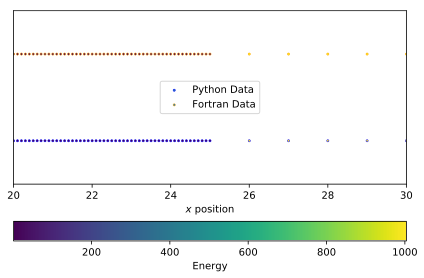

In [6]:
plt.scatter(positions, [-0.5]*len(positions), c=energies, s=5, edgecolors="blue", linewidths=0.5, label="Python Data")
plt.scatter(pos, [+0.5]*len(pos), c=U, s=5, edgecolors="orange", linewidths=0.5, label="Fortran Data")
plt.xlim(20, 30)
plt.ylim(-1, 1)
plt.xlabel("$x$ position")
plt.colorbar(orientation="horizontal", label="Energy")
plt.gca().axes.yaxis.set_visible(False)
plt.legend(loc="center")
plt.tight_layout()

Looks good! Now we can pass these to our SPH stuff:

(note that $\eta = 10$ is equivalent to 20 neighbors in 1D for the GADGET kernel).

In [24]:
data = PressureEntropyData(positions, energies, eta=10.)
plotmin = 20
plotmax = 30

Grabbing the GadgetData object
Calculating smoothing lengths
Calculating densities
Calculating pressures
Starting Pressure-Entropy calculation
Minimising to find values of A
Difference: 1.1881473982774917
Difference: 0.04363952301664786
Difference: 0.0021247924651164873
Difference: 0.00016732981662392898
Difference: 1.4696107669687208e-05
Difference: 1.4245123716449815e-06
Difference: 1.3637648642317313e-07
Difference: 1.3264420672953747e-08
Calculating smoothed pressures
Calculating smoothed densities


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


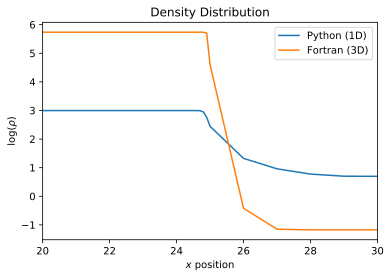

In [25]:
plt.plot(data.gadget.positions, np.log(data.gadget.densities), label="Python (1D)")
plt.plot(pos, np.log(dens), label="Fortran (3D)")
plt.xlim(plotmin, plotmax)
plt.ylabel(r"log($\rho$)")
plt.xlabel("$x$ position")
plt.title("Density Distribution")
plt.legend()

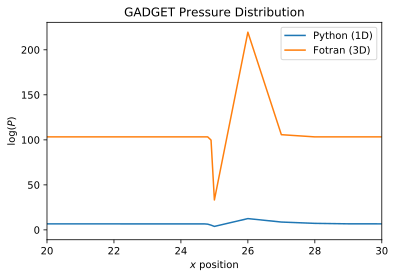

In [26]:
plt.plot(data.gadget.positions, data.gadget.pressures, label="Python (1D)")
plt.plot(pos, P, label="Fotran (3D)")
plt.xlim(plotmin, plotmax)
plt.xlabel("$x$ position")
plt.ylabel("log($P$)")
plt.title("GADGET Pressure Distribution")
plt.legend()

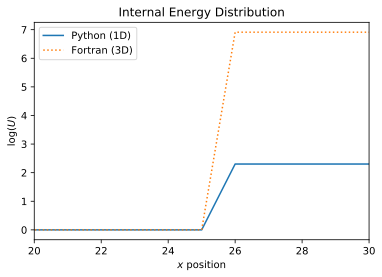

In [27]:
plt.plot(data.gadget.positions, np.log(data.gadget.energies), label="Python (1D)")
plt.plot(pos, np.log(U), linestyle="dotted", label="Fortran (3D)")
plt.xlim(plotmin, plotmax)
plt.xlabel("$x$ position")
plt.ylabel("log($U$)")
plt.title("Internal Energy Distribution")
plt.legend()

Text(0.5,1,'Smoothing Length')

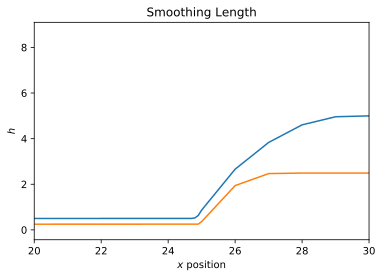

In [32]:
plt.plot(data.gadget.positions, data.gadget.smoothing_lengths, label="Python (1D)")
plt.plot(pos, h, label="Fortran (3D)")
plt.xlim(plotmin, plotmax)
plt.xlabel("$x$ position")
plt.ylabel("$h$")
plt.title("Smoothing Length")

Text(0.5,1,'Adiabat')

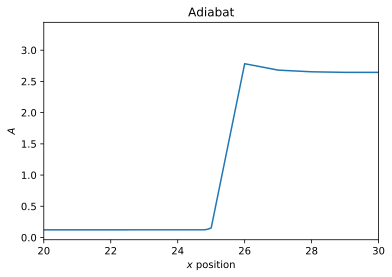

In [29]:
plt.plot(data.gadget.positions, data.adiabats)
plt.xlim(plotmin, plotmax)
plt.xlabel("$x$ position")
plt.ylabel("$A$")
plt.title("Adiabat")

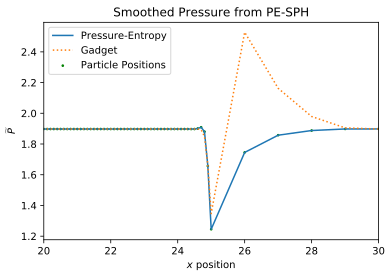

In [30]:
plt.scatter(data.gadget.positions, np.log(data.smoothed_pressures), s=3, c="green", label="Particle Positions")
plt.plot(data.gadget.positions, np.log(data.smoothed_pressures), label="Pressure-Entropy")
plt.plot(data.gadget.positions, np.log(data.gadget.pressures), ls='dotted', label="Gadget")
plt.xlim(plotmin, plotmax)
plt.xlabel("$x$ position")
plt.ylabel("$\widetilde{P}$")
plt.title("Smoothed Pressure from PE-SPH")
plt.legend()